In [8]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:

def add_icon(ax, x, y, path, zoom=0.05):
    img = plt.imread(path)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False)
    ax.add_artist(ab)


In [44]:
def read_edge_list(fileName):
    edges = []
    with open(fileName) as f:
        first = True
        for line in f:
            line = line.strip()
            if not line:
                continue        
            
            if first:
                first = False 
                continue
            
            u, v, weight = line.split()
            edges.append((int(u), int(v), float(weight)))
    return edges


In [49]:

plant_id = 0

def generate_network_plot(substation_position_file_name, edge_file_name, plot_name, edge_color):
    nodes = []
    x_coordinates = []
    y_coordinates = []
    with open(substation_position_file_name) as f:
        for line in f:
            node, x, y = line.split()
            nodes.append(int(node))
            x_coordinates.append(float(x))
            y_coordinates.append(float(y))

    edges = read_edge_list(edge_file_name)

    plt.figure(figsize=(12,12))
    fig, ax = plt.subplots(figsize=(12,12))

    for (u, v, weight) in edges:
        if (int(u) < 0 or int(v) < 0): 
            continue
        x1, y1 = x_coordinates[u], y_coordinates[u]
        x2, y2 = x_coordinates[v], y_coordinates[v]

        ax.plot([x1, x2], [y1, y2],
                color=edge_color,
                linewidth=0.8,
                alpha=0.6)

    # Scatter points
    ax.scatter(x_coordinates, y_coordinates, s=10,  alpha=0.0)

    # Generator
    add_icon(ax, x_coordinates[plant_id], y_coordinates[plant_id],
            "../images/powerPlant.png", zoom=0.03)

    # Substations
    for i in range(len(nodes)):
        if i == plant_id:
            continue
        add_icon(ax, x_coordinates[i], y_coordinates[i],
                "../images/substation.png", zoom=0.02)

    plt.title(plot_name)
    plt.xlabel("X position (miles)")
    plt.ylabel("Y position (miles)")
    ax.set_facecolor("#9AF764") 
    plt.show()


In [50]:
graph_positions_file = "../graphs/graph_positions.txt"
min_cost_tree_file = "../graphs/minimumCostTree.txt"
shortest_path_tree_file = "../graphs/shortestPathTree.txt"

<Figure size 1200x1200 with 0 Axes>

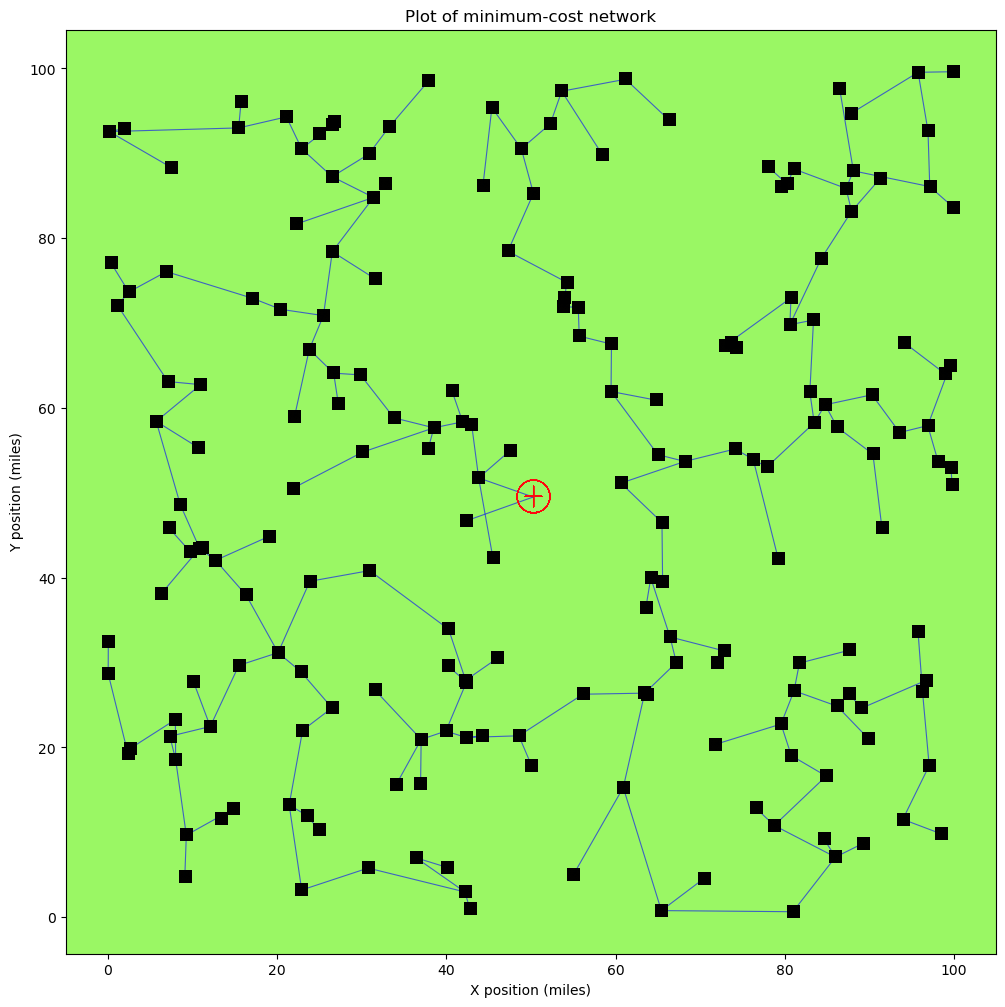

In [51]:
generate_network_plot(graph_positions_file, min_cost_tree_file, "Plot of minimum-cost network", "blue")

<Figure size 1200x1200 with 0 Axes>

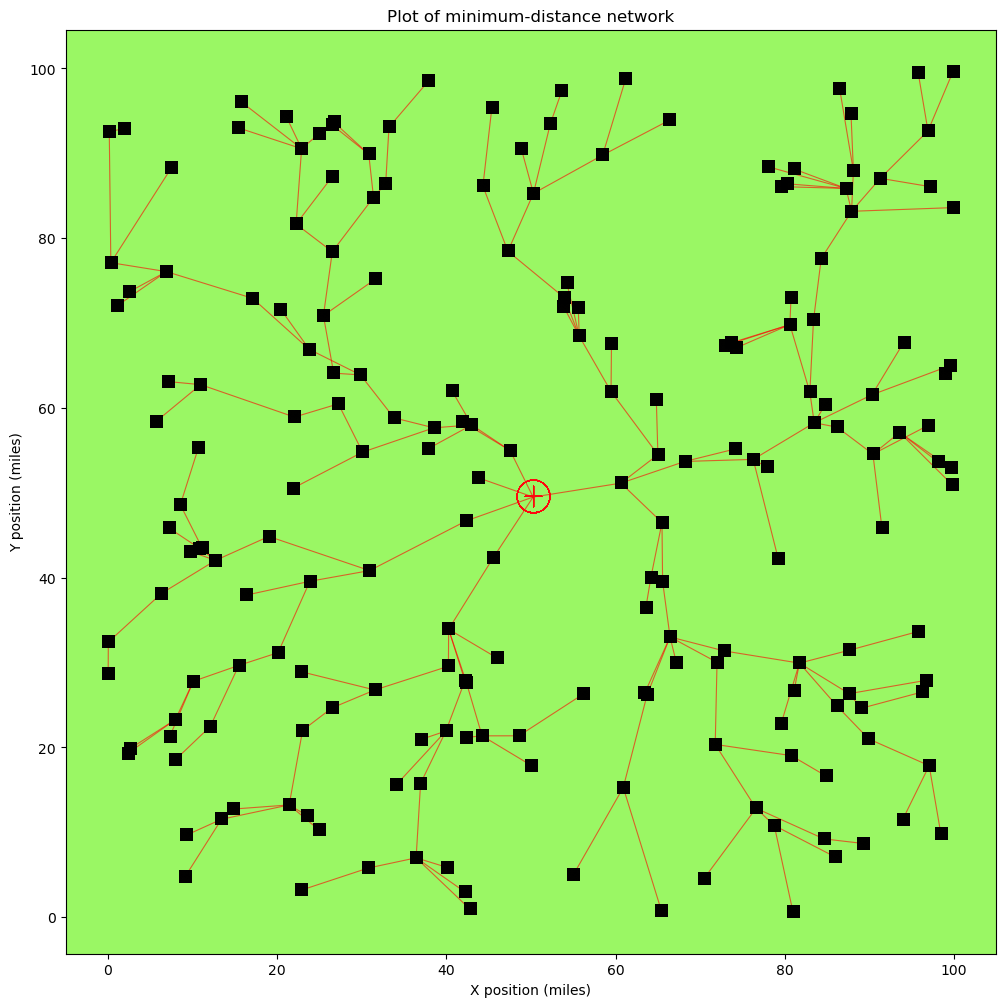

In [52]:
generate_network_plot(graph_positions_file, shortest_path_tree_file, "Plot of minimum-distance network", "red")